# **Milestone 2 - Predicting Diamond Price**

---

# **1. Introduction**

Name  : Frederick Kurniawan Putra

Batch : HCK-016  

**Objective**  
The Goal of this project is to create machine learning model to predict diamond price based on its 4C (Cut, Color, Clarity, and Carat) and any other description. We will test several models such as KNN, SVM, Decision Tree, Random Forest, and xgboost. After we evaluate models, we will tune hyperparameter to improve our models. After that, we will test our model to see evaluate our final models performance, and we are going to deploy the model to website.

# **2. Import Libraries**  

In [353]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# For Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr, pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OrdinalEncoder

# For Model Definition & Training
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# For Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score


# For Saving Models
import pickle

# To Deactivate Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all columns
pd.options.display.max_columns = 200

**Import Libraries - Explanation**


Before we commence the project, we `import all the necessary libraries required to facilitate various tasks throughout the project`. Each library serves as a tool for specific purposes as indicated by the comments provided above the code. These libraries provide functionalities ranging from data manipulation, visualization, and model building, etc., enabling us to efficiently conduct data analysis and develop machine learning models for our project.


# **3. Data Loading**

## Import Dataset

In [354]:
#see all columns name
pd.set_option('display.max_columns',None)

#import data from csv
df = pd.read_csv('diamonds.csv') # input your file name

**Import dataset - Explanation**

During data loading, first we import dataset from provided csv file and extract all data inside it. All data will be inserted into initial dataFrame `df`

In [355]:
# Show First 10 Row of Data
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [356]:
# Load Last 10 Row of Data
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


## Checking Dataset Summary

In [357]:
#Checking data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Checking Data Summary - Insight**

* There are 53940 entries in dataset with no entries with null values.
* There are 11 columns (3 categorical columns, and 8 numerical columns). Numerical columns consists of 2 columns with int64 data type, and 6 columns with float64 data type.
* Unnamed: 0 has column are id column and will be dropped.

In [358]:
# Identifying Target Column
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

## Check Data Duplicates

In [359]:
# Check Data Duplicates
df.duplicated().sum()

0

**Check Data Duplicates - Explanation**

The code above helps us find out if there are any duplicate entries in our dataset. When we run it, and the output shows 0, it means `there are no repeated rows or data duplicates in our dataset`. Therefore, we don't need to do anything further to handle duplicated data.

## Check Missing Values

In [360]:
#checking for unique value to see if there are non standard missing value
for x in df:
    display(df[x].unique())

array([    1,     2,     3, ..., 53938, 53939, 53940])

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

array([ 326,  327,  334, ..., 2753, 2755, 2756])

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

**Checking Missing Values - Explanation**  
  
Code above used to show how many missing values on each column. Here we found that there are no standard and non-standard missing value. But we see 0 value in column x, y, z which is size dimension of the diamond. Having 0 mm in length, width, and depth are not making any sense. And so we will investigate further if there is any connection of 0 value to other column.

In [361]:
#checking row with x = 0
df[df['x'] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [362]:
#checking row with y = 0
df[df['y'] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [363]:
#checking row with z = 0
df[df['z'] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


**Investigating 0 values on dataset - Explanation**

From this investigation, we can see that row with 0 values in x,y,z columns doesn't have any relation with any other columns or any context. And so we will treat this value as MCAR for missing value handling.

## Drop Id Column

In [364]:
df_clean = df.copy()
df_clean.drop(columns=['Unnamed: 0'],inplace=True)

# **4. Exploratory Data Analysis**


## Numerical and Categorical Data Descriptive Summary

In [365]:
# Numerical Columns Descriptive Summary
df_clean.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [366]:
# Categorical Data Descriptive Summary
df_clean.describe(include='object').T

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


**Numerical and Categorical Data Descriptive Summary - Explanation**

From these insights, we can found some insights:

* Mean of carat are around 0.797 carat, with min on 0.3 carat and max on 5.01 carat, implying that only small fraction of diamonds in this dataset having extremely high carat.
* Diamond prices are ranging from 326 USD to 18823 USD, with mean on 3932. This imply that diamond price are extremely varied depending on its characteristic.
* Standard variance is notably high on price, suggesting that outlier might be present in this column.
* There are 5 unique values on cut columns, with `Ideal` become the most frequent value in this columns, having mostly 50% from all amount of datas. This implies that many diamonds in dataset has overall perfection on its facets, which will impact the beauty of the diamond itself.
* There are 7 unique values on color columns. `G` are the most frequent values in this column with 11292 frequencies.
* Most diamonds in this dataset has clarity on `SI1`, meaning that most diamonds have clarity inclusion that can be seen with 10x magnification, but still looks clear with naked eyes.

## Univariate

### How is the frequency of Cut Quality from this dataset?

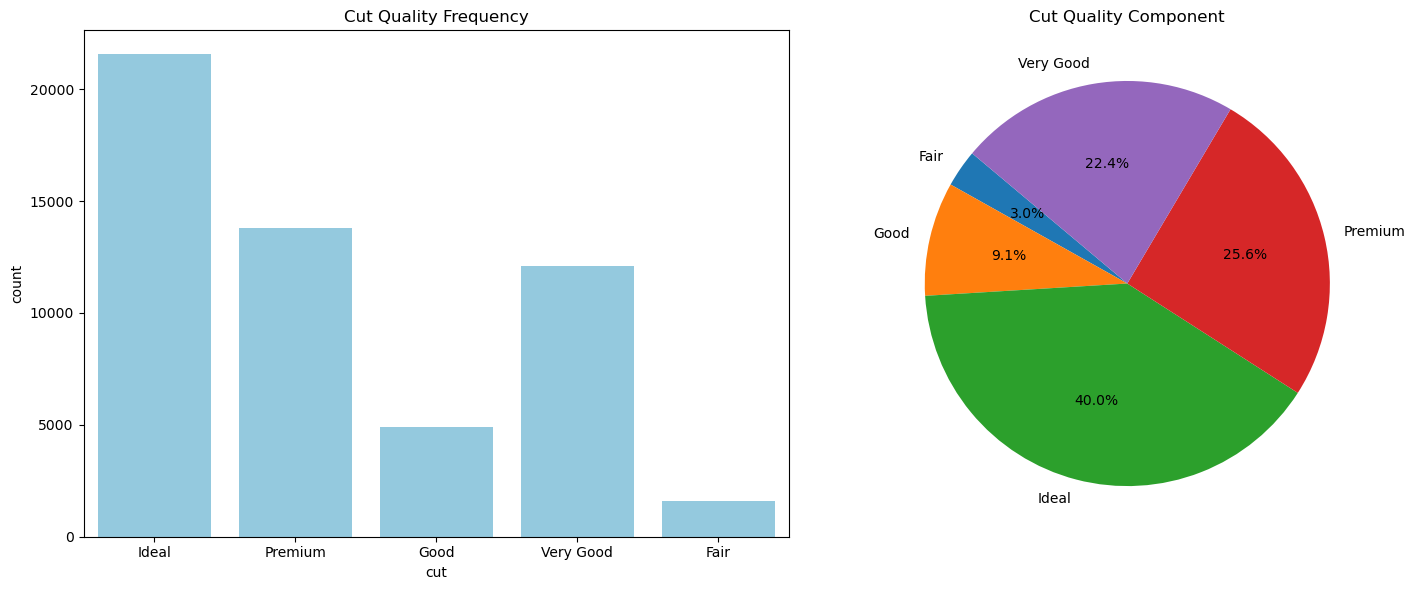

In [367]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#cut count
cut_count = df['cut'].value_counts().sort_index()

#cut label
cut_labels = cut_count.index.tolist()

# Cut Category Frequency
sns.countplot(df_clean, x='cut',ax=axs[0],color='skyblue')
axs[0].set_title('Cut Quality Frequency')

#Cut Category Pie Chart
axs[1].pie(cut_count,labels=cut_labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Cut Quality Component')

plt.tight_layout()
plt.show()

**Frequency of Cut Quality - Insights**

From these plots, we can conclude some insights:

* From Cut we can see that 3% of diamond in this datasets are having fair cut, while Ideal cut has highest count compared to all categories with 40% from total percentage. This implies that most of dataset have above standard cut quality with lower quality only on fair improvement because the lowest cut quality category in here are Fair, and it is the lowest count percentage overall.


### How is the frequency of Color Quality from this dataset?

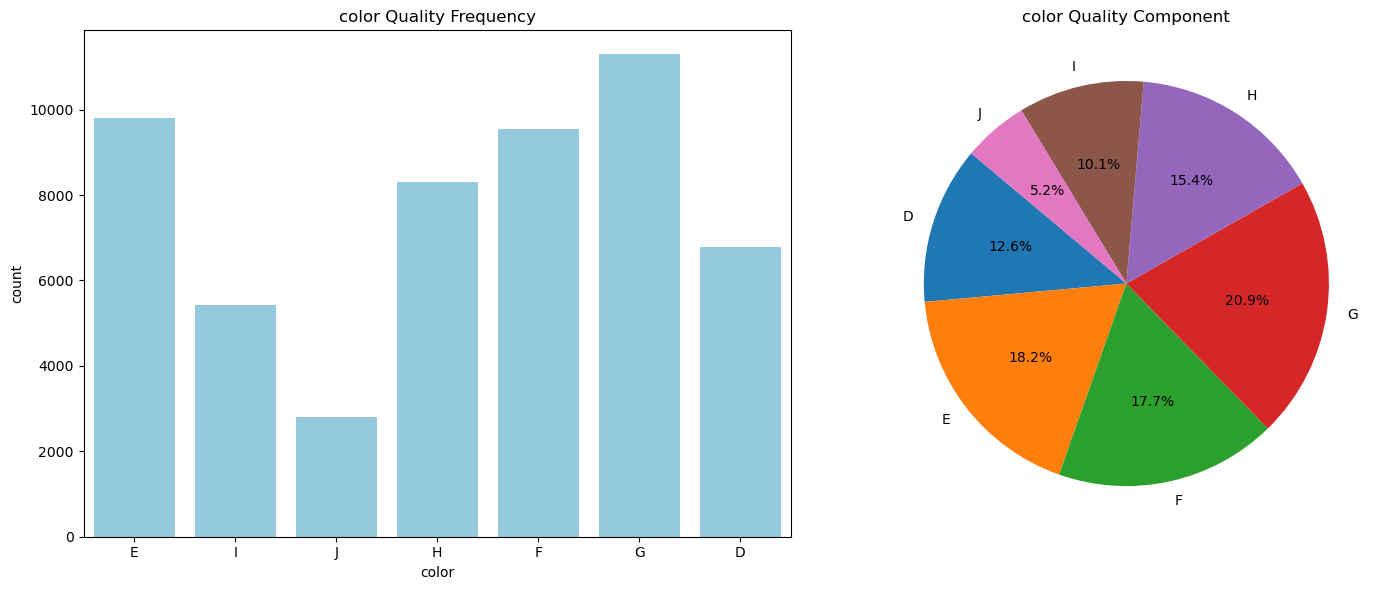

In [368]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#color count
color_count = df['color'].value_counts().sort_index()

#color label
color_labels = color_count.index.tolist()

#Color Category Frequency
sns.countplot(df_clean, x='color',ax=axs[0],color='skyblue')
axs[0].set_title('color Quality Frequency')

#Color Category Pie Chart
axs[1].pie(color_count,labels=color_labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('color Quality Component')

plt.tight_layout()
plt.show()

**Frequency of Color Quality - Insights**

* From Color category, we can see that J category has lowest count. This also are the lowest quality from this set. This imply that only small fraction of diamond dataset has low quality. Rest of color quality category aren't significantly different in terms of percentage.
* G color, which is the highest quality color for near colorless Diamond are the highest count with 20.9% percents count. But colorless color quality which is higher quality such F, E, and D have small percentage difference compared to G, meaning that many diamonds in this dataset has generally good quality in term of color.

### How is the frequency of Clarity Quality from this dataset?

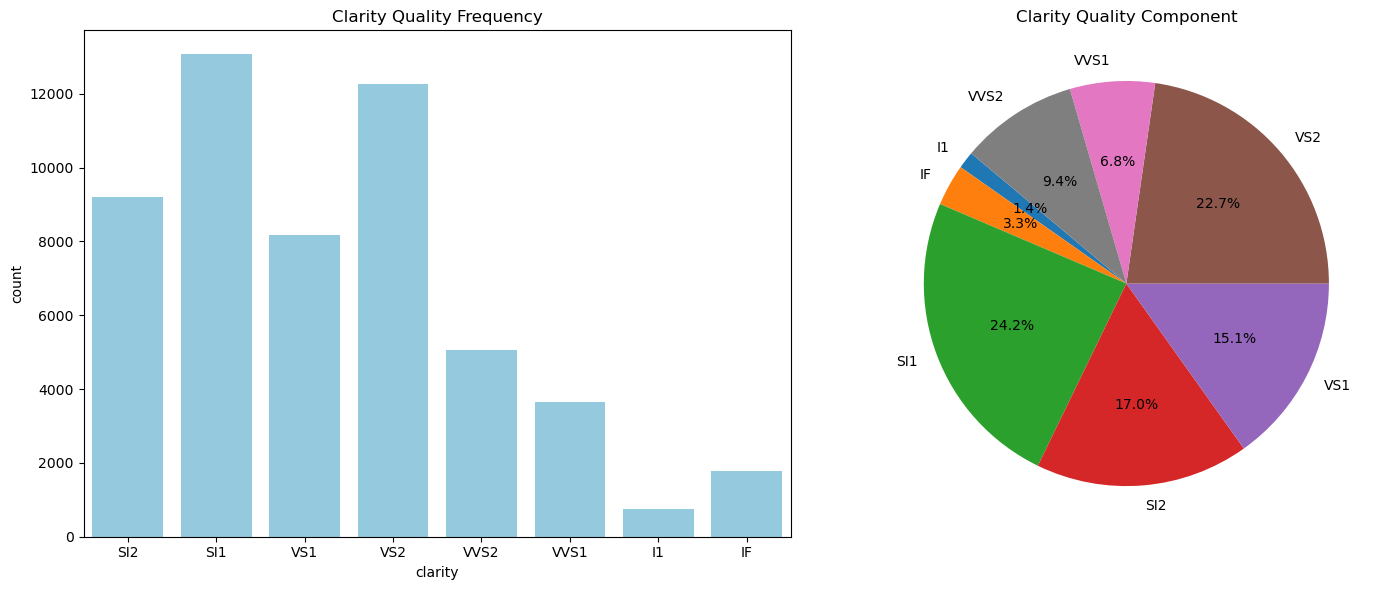

In [369]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Clarity count
clarity_count = df['clarity'].value_counts().sort_index()

#Clarity label
clarity_labels = clarity_count.index.tolist()

#Clarity Category Frequency
sns.countplot(df_clean, x='clarity',ax=axs[0],color='skyblue')
axs[0].set_title('Clarity Quality Frequency')

#Clarity Category Pie Chart
axs[1].pie(clarity_count,labels=clarity_labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Clarity Quality Component')

plt.tight_layout()
plt.show()

**Clarity Quality Frequency - Insights**

* There are only small amount of diamonds that have l1, which is one of worst quality because of how inclusions are visible by naked eyes. IF and VVS1 which is having the best clarity quality, also has lower amount in this plot.
* SI1 has the highest percentage on pie chart with 24.2%, followed by VS2 with 22.7%, SI2, and VS1. These clarity grades are mid level grade, implying that many diamonds in this dataset are having mid level grade. This is logical as high clarity diamonds are rare, and most of diamonds with these mid level grade clarity are good enough since people won't notice inclusions in these grades with naked eyes. 

### How is the frequency of Carat Quality from this dataset?

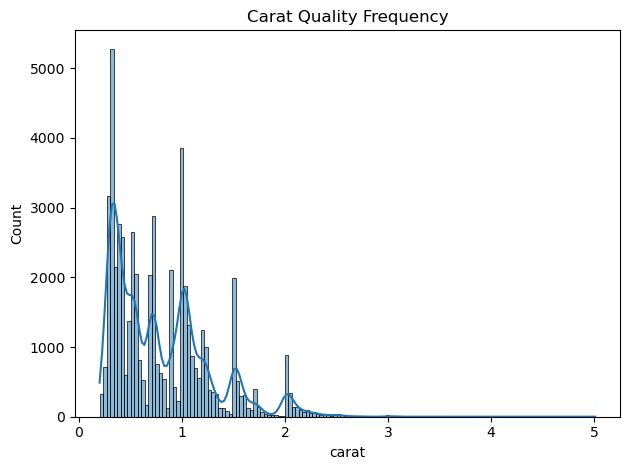

In [370]:

# Carat Category Frequency
sns.histplot(df['carat'], linewidth=0.5, kde=True)
plt.title('Carat Quality Frequency')

plt.tight_layout()
plt.show()

**Carat Distribution - Insights**


* From Carat value distribution plot, we can see that datas are highly distributed around 0.30 carat to 1.0 carats. This implies that most of diamonds in this data are light weighted since carat represents weight of the diamond itself.

### What is Distribution of Diamond Width?

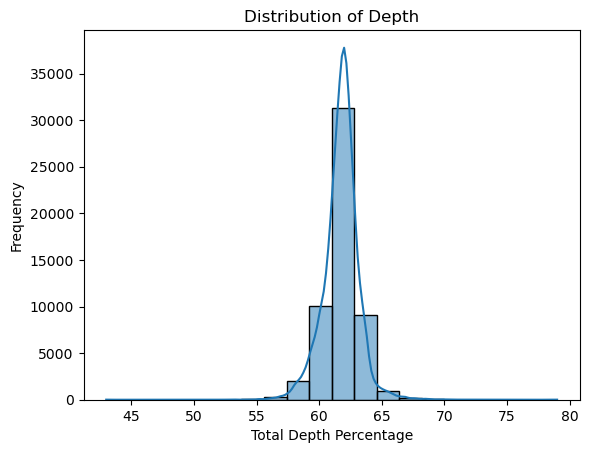

In [371]:
sns.histplot(df_clean['depth'], bins=20, kde=True)
plt.title('Distribution of Depth')
plt.xlabel('Total Depth Percentage')
plt.ylabel('Frequency')
plt.show()

**Distribution of Total Depth Percentage - Insights**

* From this plot, we can see that distribution of depth percentage are around 61% to 63%. which an ideal depth percentage on some diamond shape. This implies that many diamonds in this dataset have less low-quality diamonds that aren't cut well.

### What is Distribution of Diamond Table?

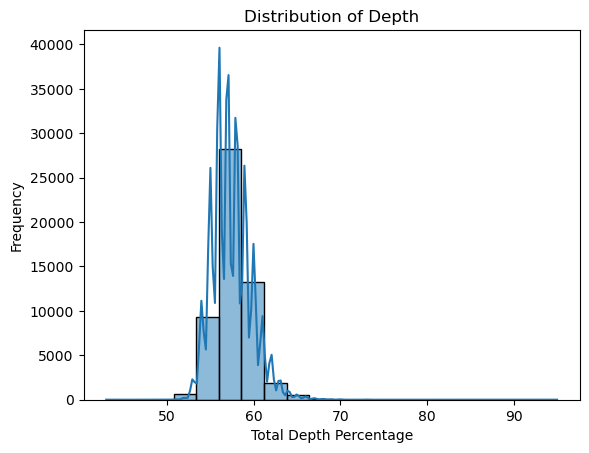

In [372]:
sns.histplot(df_clean['table'], bins=20, kde=True)
plt.title('Distribution of Depth')
plt.xlabel('Total Depth Percentage')
plt.ylabel('Frequency')
plt.show()

**Distribution of Diamond Tables - Insights**

* Most of diamonds in this database are highly distributed around 55% to 60% percents. Diamonds that is falling into this categories usually having ideal Table percentage. From this plot and insights from depth percentage distribution, we can see that most of diamonds in this dataset are cutted well, which results in good brilliance.  

## Bivariate

### How are Length, Width, and Depth influence pricing?

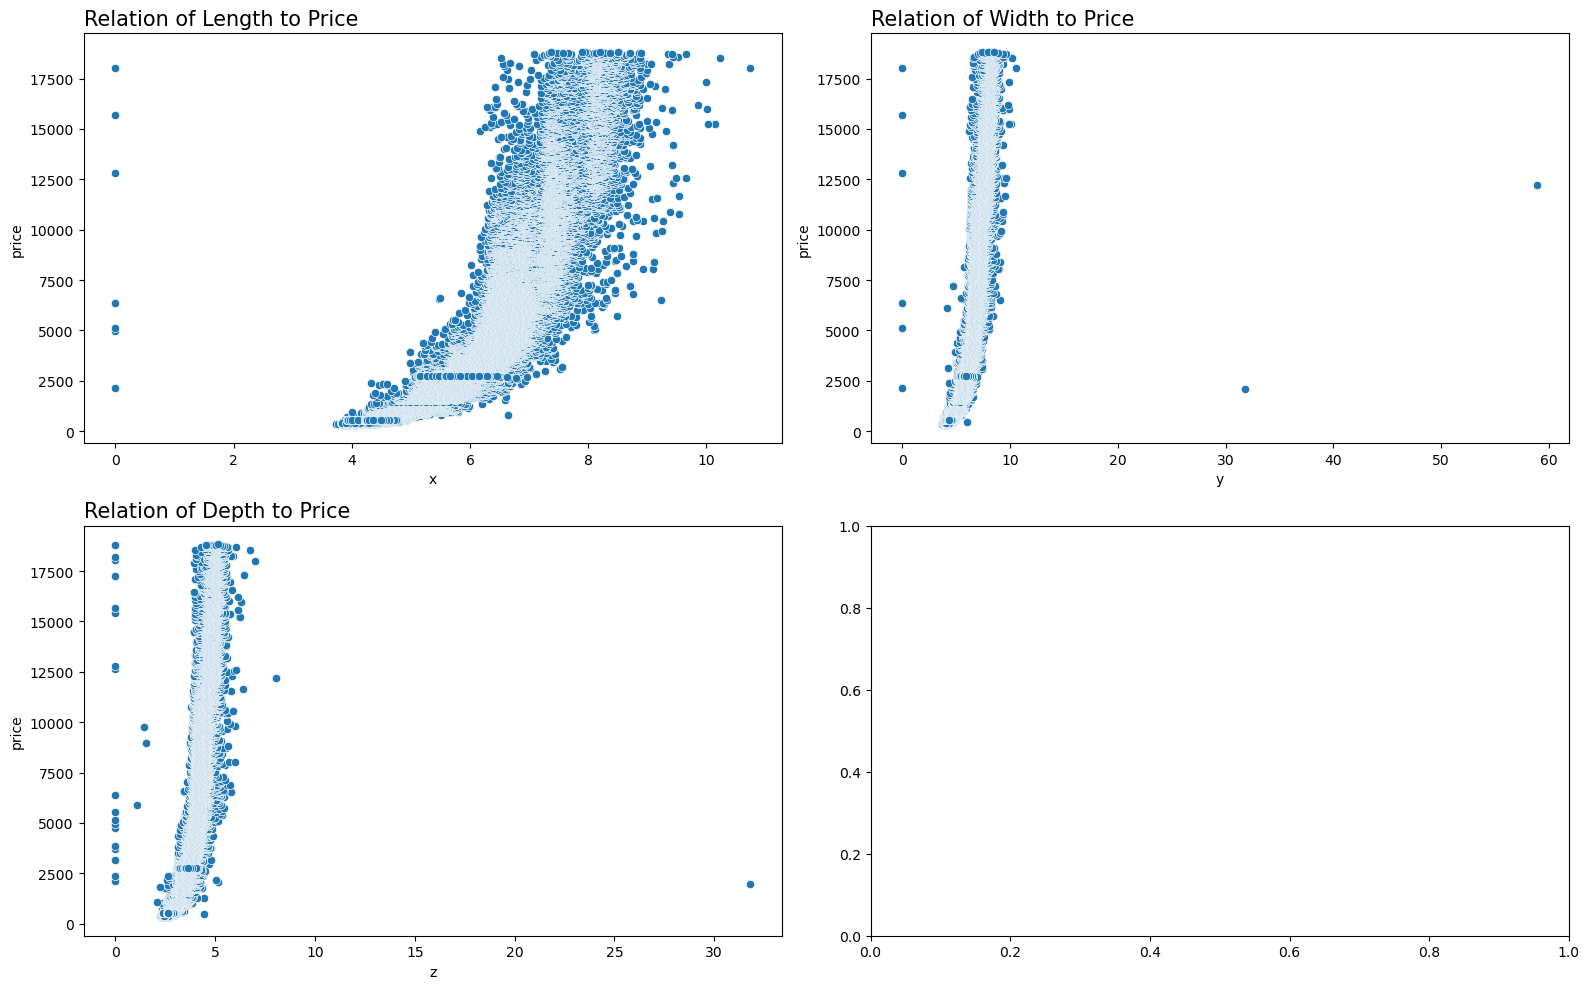

In [373]:
fig, axs = plt.subplots(2, 2,figsize=(16, 10))

# Length to Price
sns.scatterplot(df_clean, x='x', y='price', ax=axs[0, 0])
axs[0,0].set_title('Relation of Length to Price', loc='left', size=15)

# Width to Price
sns.scatterplot(df_clean, x='y', y='price', ax=axs[0, 1])
axs[0,1].set_title('Relation of Width to Price', loc='left', size=15)

# Depth to Price
sns.scatterplot(df_clean, x='z', y='price', ax=axs[1, 0])
axs[1,0].set_title('Relation of Depth to Price', loc='left', size=15)

# # Carat Frequency
# sns.histplot(df['carat'], linewidth=0.5, ax=axs[1, 1])
# axs[1,1].set_title('Carat Value Distribution', loc='left', size=15)

plt.tight_layout()
plt.show()

**Length, Width, Depth Relation to Price - Insights**

From these plots, we can get some insights:
* There is a positive correlation between Length and Price, which as Diamond lenght increased, so the price. But the relationship is not perfectly linear, as the data points are not perfecly clustered on straight line, but a rather curved one. This suggests that the length increase, the price are increasing at steeper angle, which means that the price are become more expensive and increasingly valuable.
* For Width and Depth, the relation with price seems similiar with length plot. There is positive correlation where as width and depth increase, so the price. But the relationship is not perfectly linear. The acceleration of price increase as width and depth increase are also higher than Length to Price relationship. This suggests that small increase in Depth and Width will highly increase pricing in general.

### How is Relation of Carat to Price?

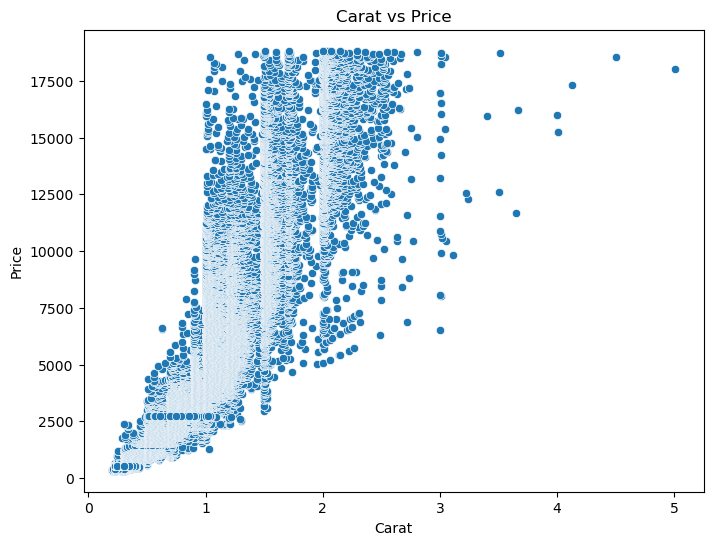

<Figure size 640x480 with 0 Axes>

In [374]:
plt.figure(figsize=(8,6))

plt.title('Carat vs Price')
sns.scatterplot(x=df_clean['carat'],y=df_clean['price'])
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

**Relation between Carat to Price - Insights**

* There are positive correlation between diamond carat to its price, where as carat increase, so the price.
* The relation is not linear because many data points doesn't form a perfect line, but rather a curved one. This indicates that in general as carat increase, the price increased rapidly.
* Some data points are highly clustered on 1 and approximately 1.5 and 2 carat with wide variety of price. This suggests that diamonds are desirable in this seems standardized carat weight, which is a lightweight diamonds that may be vary from lower price to higher price that might depends on other 4C factor(Clarity, Cut, Color) and also its size.
* In this plot we can see several outliers that has extremely high carats with narrow to no variety of price, particularly on higher side of price. This suggests that extremely high carat diamonds can be considered a product with high prestige value.

## **Multivariate**

### How do diamonds price vary based on color, cut, and clarity?

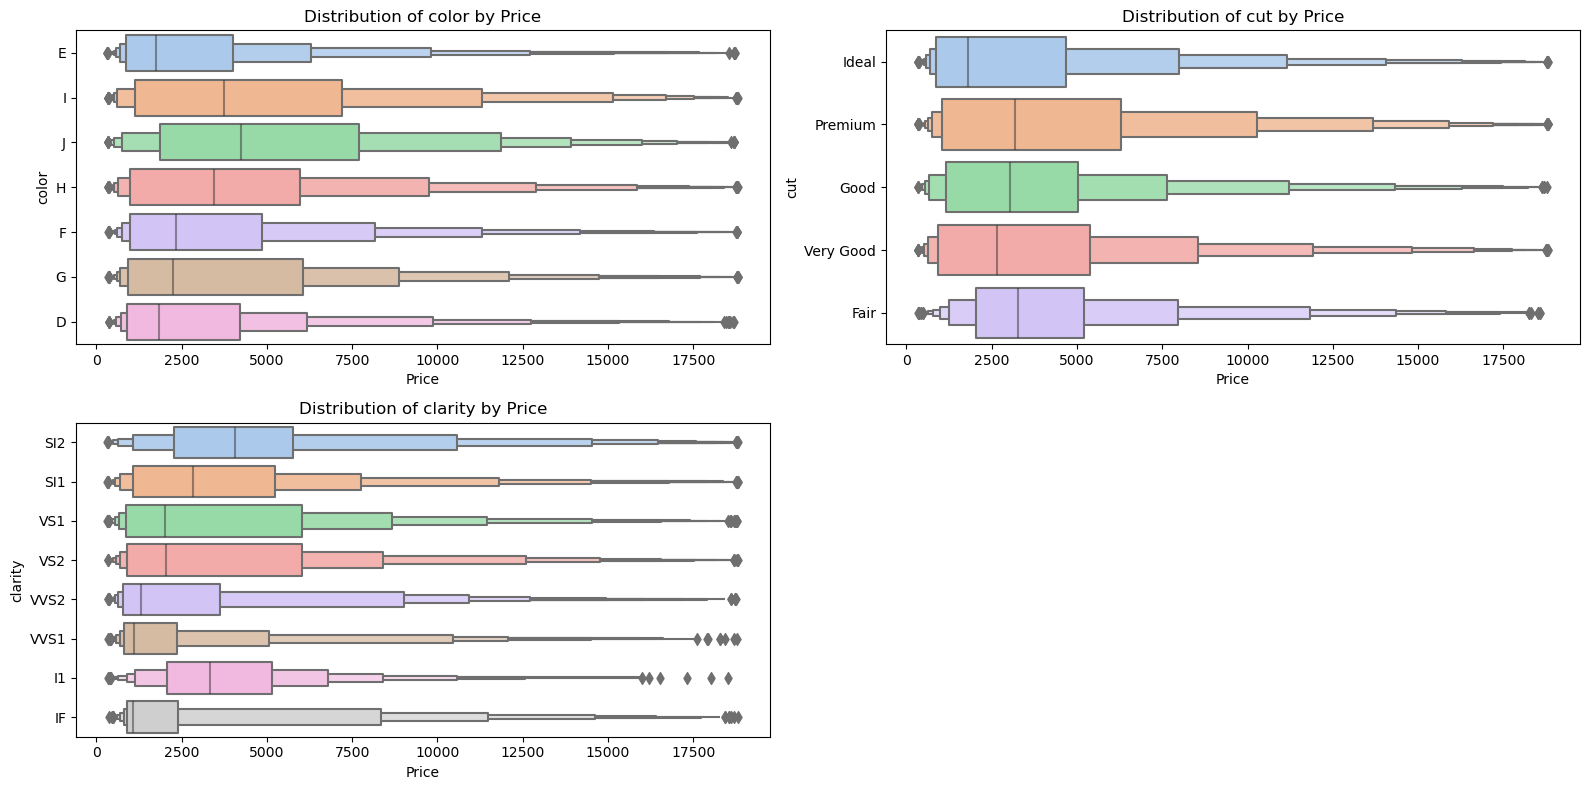

In [375]:
# Boxplots of Services to overall Satisfactions

# Define service columns
quality_cat_col = ['color','cut','clarity']

# Create subplots for each service rating
num_cols = len(quality_cat_col)  # Exclude 'satisfaction' column
num_rows = (num_cols + 1) // 2  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, num_rows * 4))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Iterate through each service rating and create a box plot
for i, column in enumerate(quality_cat_col):  # Exclude 'satisfaction' column
    sns.boxenplot(x='price', y=column, data=df_clean, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Price')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel(column)

# Hide the empty subplot if the number of columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axes[num_cols])

# Showing the plot
plt.tight_layout()
plt.show()

**Price Variation based on Color, Cut, and Clarity - Explanation**

From these plots, we can get some insights:
* On color quality, J color is having higher price median compared to any color quality, even though J is the lower quality in near colorless category. On the other hand, D (absolutely colorless) which is the highest quality in diamond color, are second lowest price median. This suggests that customer doesn't see higher quality color as sole determinator for setting the price.
* On cut quality, Fair has highest price median, while Ideal which is the highest cut quality, has lowest price median. On the other hand, Premium which is second highest quality cut, has wider range of price variety. This implies that diamonds market has more demand on Fair cut and Premium cut compared to Ideal cut, assuming that fair and premium cut are more accessible compared to ideal, and also other factor might also influence price.
* On clarity, we can see that SI2 has higher median on price compared to other clarity classification. SI2 are second lowest clarity quality, before l1, which also have higher median on price. This implies that clarity also cannot become a sole determinator for setting the price.

# **5. Feature Engineering**

## Test-Train Split

In [376]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']


#Seperating dataset into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#feature train
print(f'X_train set shape: {X_train.shape}')
#feature test
print(f'X_test set shape: {X_test.shape}')
#label train
print(f'y_train set shape: {y_train.shape}')
#label train
print(f'y_train set shape: {y_test.shape}')    

X_train set shape: (43152, 9)
X_test set shape: (10788, 9)
y_train set shape: (43152,)
y_train set shape: (10788,)


**Train-Test Split - Explanation**

In this part, we split our dataset into train and test dataset with 80% Train and 20% Test split with composition such as:
* Train set consist of 43152 rows with 9 features, and also splitted to X_train for features, and y_train for target.
* Test set that consist of 10788 rows with 1 target, and also splitted to X_test for features, and y_train for target.
 
We use test_size=0.2, meaning that the ratio for train and train is 80:20. We choose this ratio because of this ratio become standard for early iteration of model building.

## Missing Values Handling

In [377]:


index_train_xyz = X_train[(X_train['x'] == 0) | (X_train['y'] == 0) | (X_train['z'] == 0)].index
index_test_xyz = X_test[(X_test['x'] == 0) | (X_test['y'] == 0) | (X_test['z'] == 0)].index

#drop entries that have missing value in `price` column
X_train.drop(index_train_xyz, inplace=True)
y_train.drop(index_train_xyz, inplace=True)

X_test.drop(index_test_xyz, inplace=True)
y_test.drop(index_test_xyz, inplace=True)



In [378]:
X_train[(X_train['x'] == 0) | (X_train['y'] == 0) | (X_train['z'] == 0)].sum()
X_test[(X_test['x'] == 0) | (X_test['y'] == 0) | (X_test['z'] == 0)].sum()

print(f"Length of X_train : {len(X_train)}")
print(f"Length of y_train : {len(y_train)}")
print(f"Length of X_test : {len(X_test)}")
print(f"Length of y_test : {len(y_test)}")

Length of X_train : 43139
Length of y_train : 43139
Length of X_test : 10781
Length of y_test : 10781


## Outlier Handling

In [379]:
# Filer Numerical Columns in X train
numeric_columns = X_train.select_dtypes(include=np.number).columns.to_list()

# Skewed columns container
skewed_numeric_data = []
skewed_numeric_columns = []

# Normal distribution columns container
normal_numeric_data = []
normal_numeric_columns = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for column in numeric_columns:
    skewness = X_train[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        normal_numeric_columns.append(column)
        normal_numeric_data.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        skewed_numeric_columns.append(column)
        skewed_numeric_data.append([column, skewness])

**Outlier Handling - Explanations**
In this step, we will select all numerical columns and grouped into normal distributed column and skewed column with:
* Column has normal distribution if skewness <= 0.5 and skewness >= 0.5 after checking its skewness.
* Column has skewed distribution if skewness < -0.5 or skewness > 0.5  after checking its skewness.


In [380]:
# Showing all columns with normal distribution and each skewness
print('Columns with Normal Distribution')
pd.DataFrame(data=normal_numeric_data, columns=['normal_distributed_columns', 'skewness'])

Columns with Normal Distribution


,normal_distributed_columns,skewness
0,depth,-0.059285
1,x,0.399999


**Columns with Normal Distribution - Explanation**  
In this step, we found that there `depth` and `x` columns has normal distribution. In the next step, we will handle outliers on these outlier with winsorizer applying gaussian capping method.  

In [381]:
# Showing all columns with skewed distribution and each skewness
print('Columns with Skewed Distribution')
pd.DataFrame(data=skewed_numeric_data, columns=['skewed_columns', 'skewness'])

Columns with Skewed Distribution


,skewed_columns,skewness
0,carat,1.115216
1,table,0.819608
2,y,2.701468
3,z,1.862623


**Columns with Skewed Distribution - Explanation**  
In this step, we found that there `carat`, `table`, `y`, `z` columns has skewed distribution. In the next step, we will handle outliers on these outlier with winsorizer applying IQR capping method.

In [382]:
# Capping Method for Normal Distribution  
winsorizer_normal_distribution = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=1.5,
                            variables=normal_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_distribution.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_distribution.transform(X_test)

In [383]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skewed_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [384]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


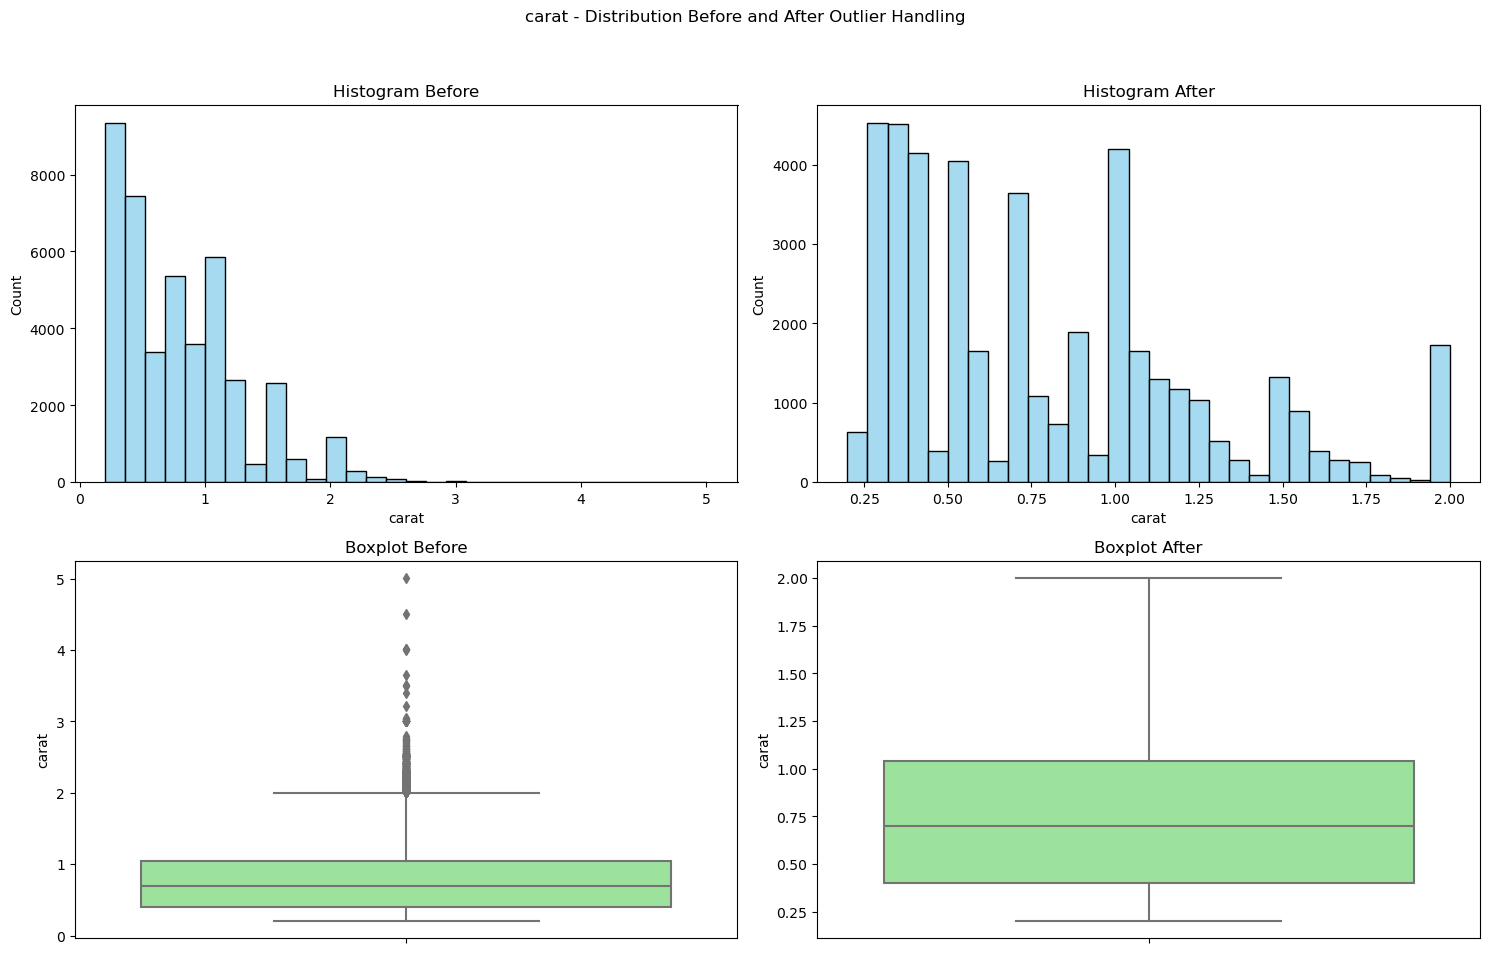

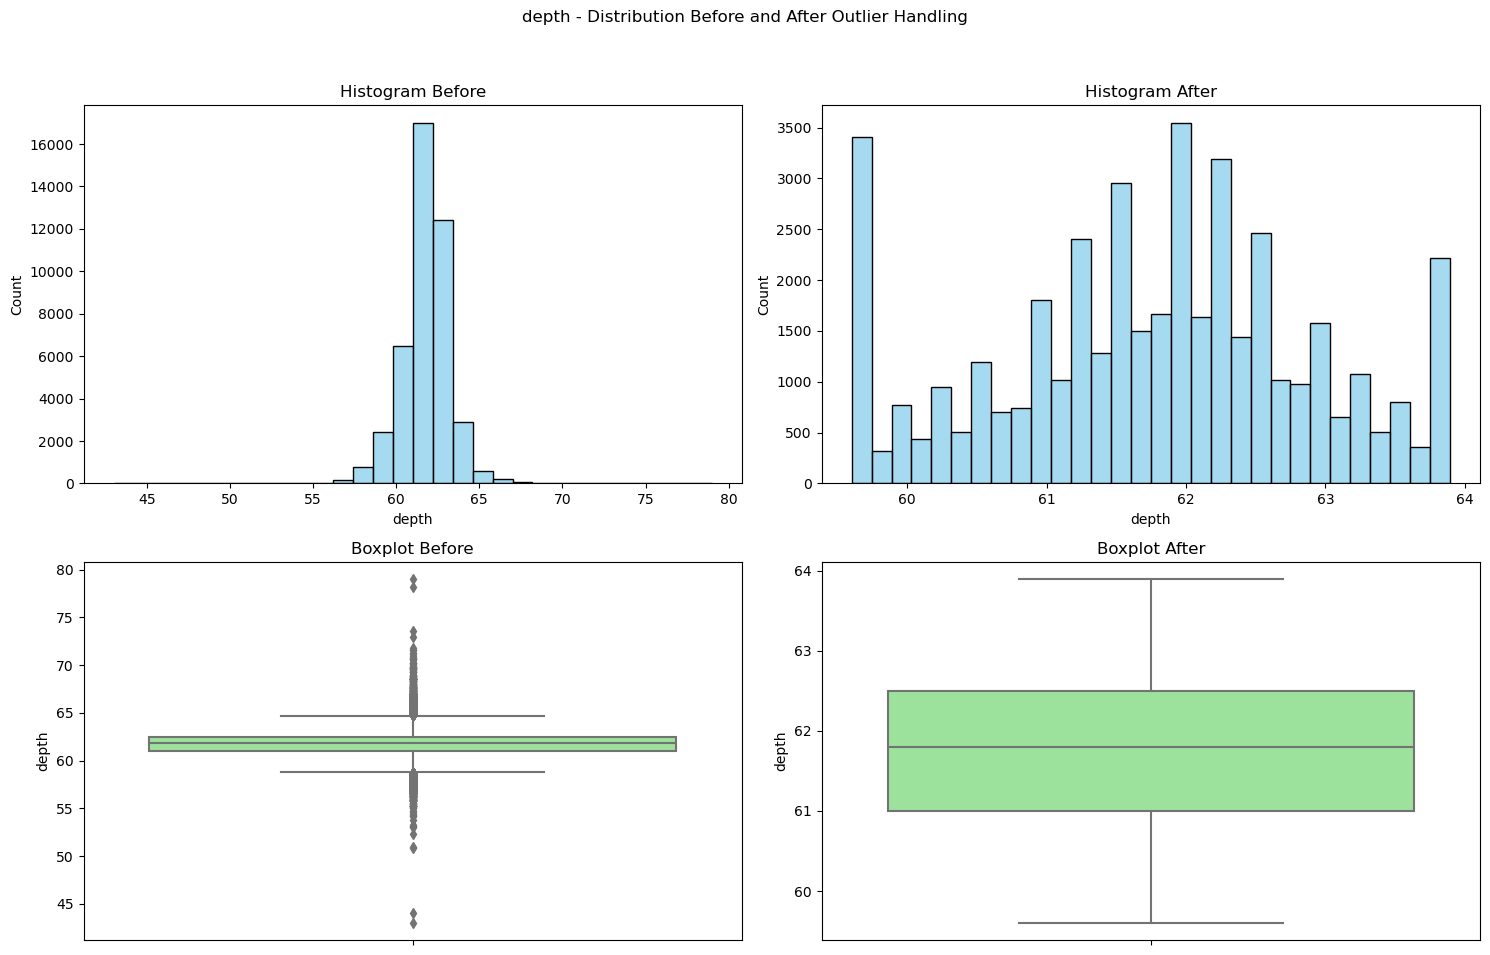

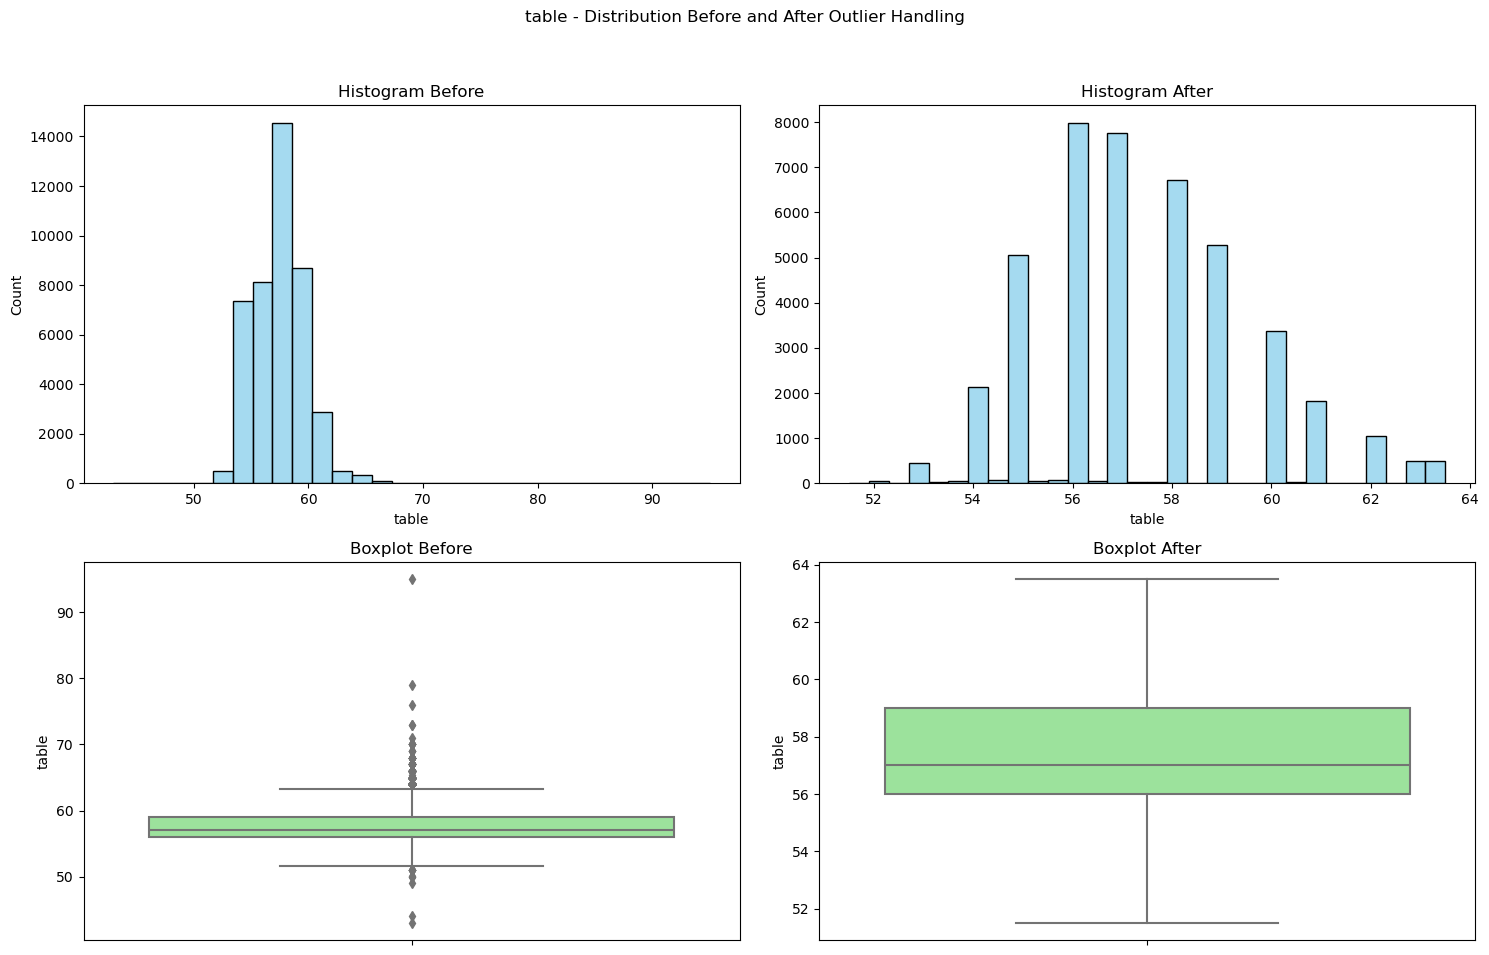

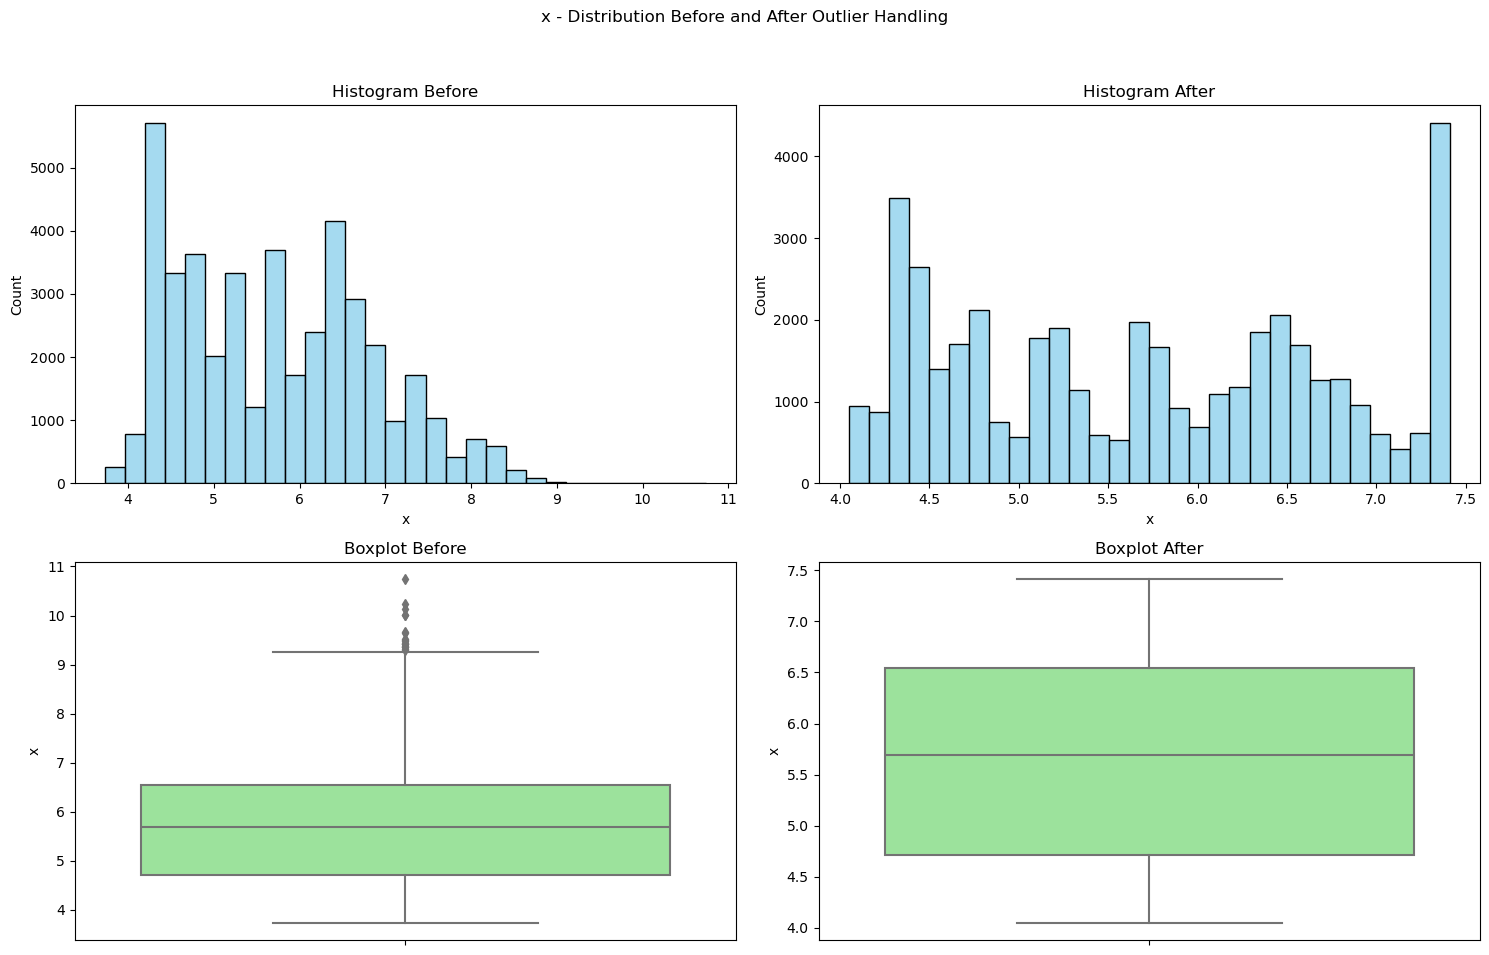

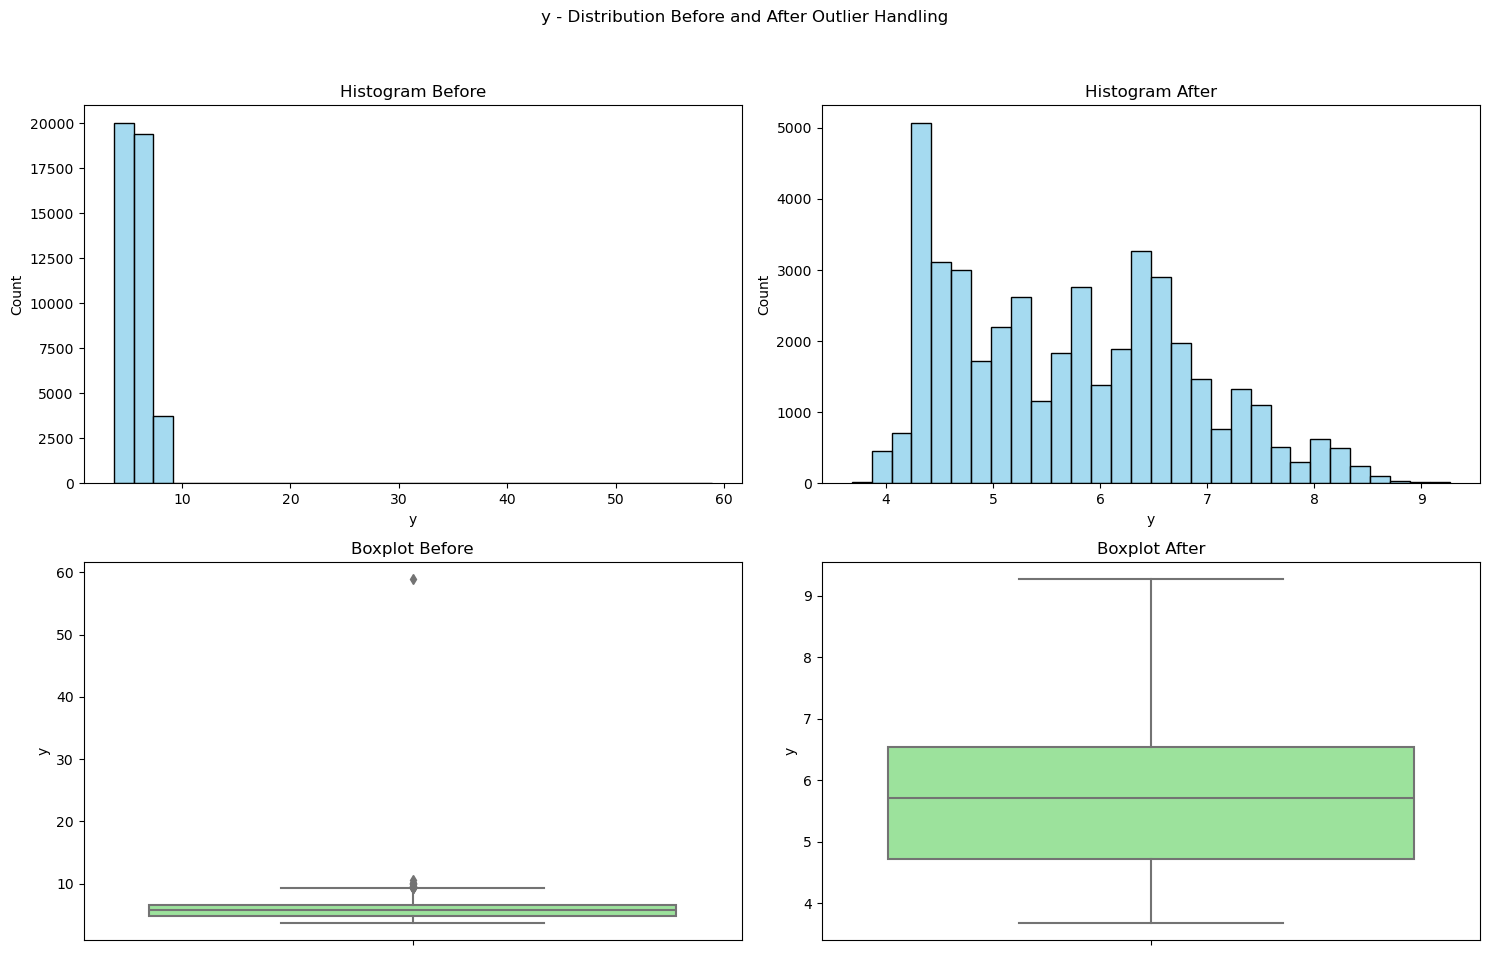

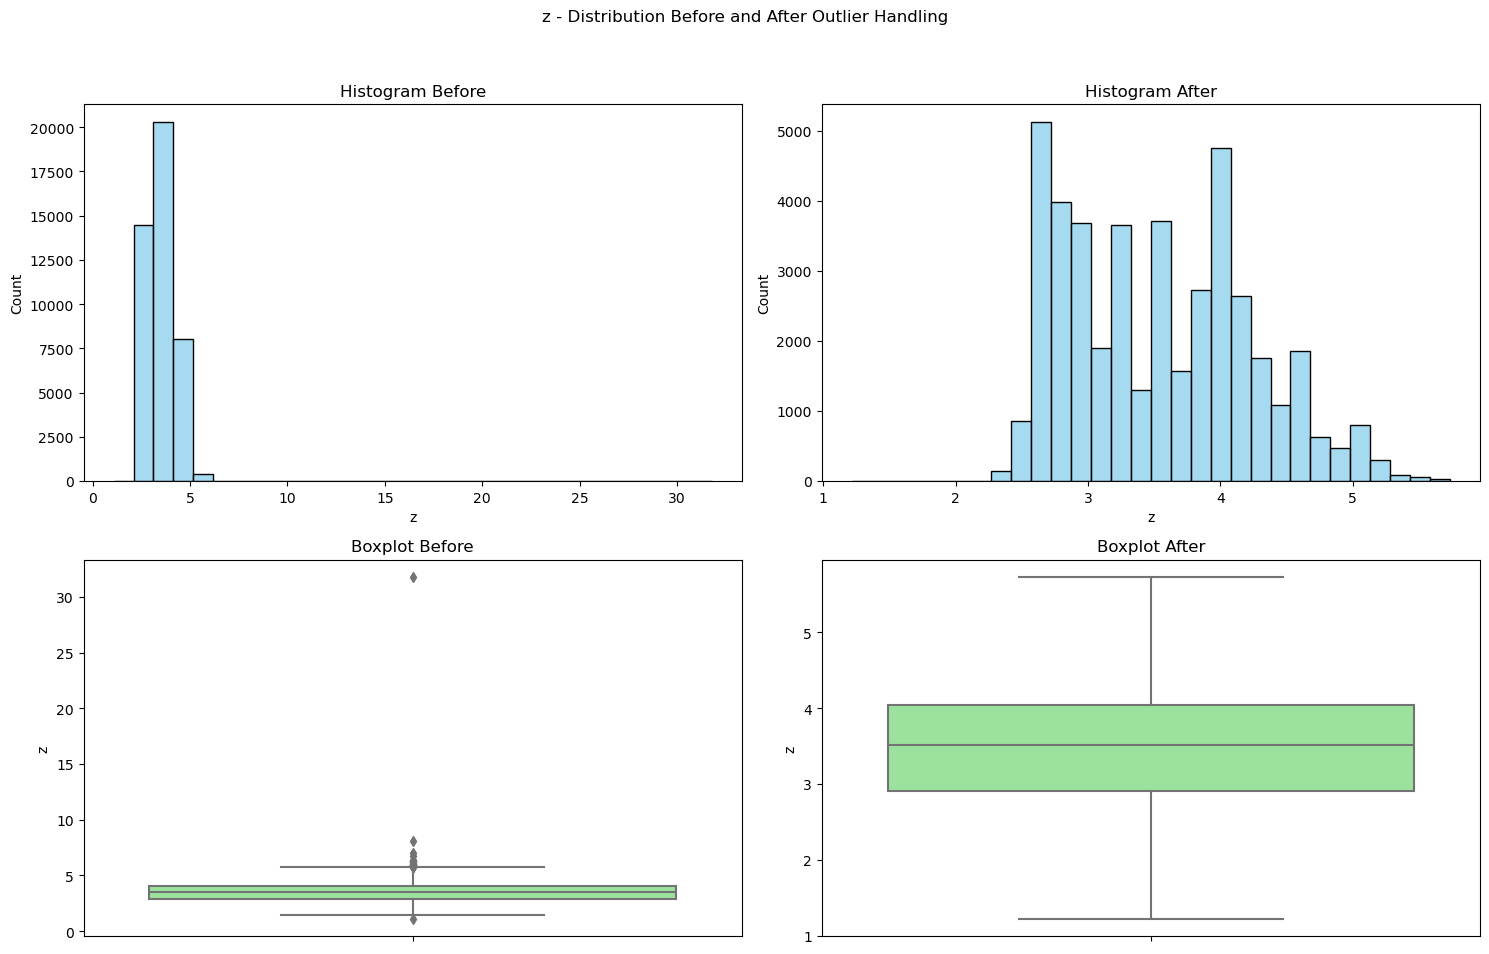

In [385]:
# Using the Function
num_cols = numeric_columns
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

**Outlier Handling - Explanation**

After we handling the outlier, we show some visualization on before handling outlier and after handling outlier. We can see that all outliers on normally distributed and skewed distributed has been handled. And so we can conlude that Outlier Handling process has been done successfully

## Feature Selection

### Checking Correlation

In [386]:
# Separating numeric and categorical data
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

In [387]:
# Checking the data
print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['cut', 'color', 'clarity']
Numerical Columns : ['carat', 'depth', 'table', 'x', 'y', 'z']


In [388]:
# Creating new variable
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [389]:
#Finding the correlation between categorical columns and 'price' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []
selected_cat_col = []
not_selected_cat_col = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  #if these are correlated
  if p_value < 0.05:
    interpretation.append('Significant Correlation')
    selected_cat_col.append(col)
  
  #if these are not correlated
  else :
    interpretation.append('No Significant Correlation')
    not_selected_cat_col.append(col)

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

,Column Name,Correlation Coefficient,P-value,Interpretation
0,cut,0.026763,1.329797e-13,Significant Correlation
1,color,0.105461,1.194967e-204,Significant Correlation
2,clarity,-0.081493,1.381417e-121,Significant Correlation


**Finding Correlation between Categorical Features and Target - Explanation**

Here we choose Kendall Tau Correlation test on all Categorical Features one by one against Target to see if these features are correlated with target or not. If the result is not correlated, then the feature will not be used for training. After showing the results, we can see that all categorical features has significant correlation with the target. And so we will select all categorical features for the next phase.

In [390]:
#Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []
selected_num_col = []
not_selected_num_col = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
      selected_num_col.append(col)
    else :
      interpretation.append('No Significant Correlation')
      not_selected_num_col.append(col)
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
      selected_num_col.append(col)
    else :
      interpretation.append('No Significant Correlation')
      not_selected_num_col.append(col)

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

,Column Name,Correlation Coefficient,P-value,Interpretation
0,carat,0.962562,0.000000e+00,Significant Correlation
1,depth,-0.013078,6.599650e-03,Significant Correlation
2,table,0.129564,7.796987e-161,Significant Correlation
3,x,0.853304,0.000000e+00,Significant Correlation
4,y,0.888969,0.000000e+00,Significant Correlation
5,z,0.882224,0.000000e+00,Significant Correlation


**Finding Correlation between Numerical Features and Target - Explanation**

Here we choose Pearson Correlation test if data is normally distributed, or Spearman Correlation test if data is skewed on Numerical Features against Target to see if these features are correlated with target or not. If the result is not correlated, then the feature will not be used for training. From the result, we can see that all numerical features has significant correlation with target. And so, we will select all numerical features.

### Checking for Cardinality on Categorical Features

In [391]:
# Create Column Cardinality Checking Function
def check_column_cardinality(dataframe):
    '''
    This function checks the unique values and checking cardinality status in each column of a given dataset
    
    INPUT: dataframe - the dataset to analyze
    OUTPUT: a table containing columns, the number of unique values in each column, 
            a list of unique values for each column
            the status of cardinality
    '''   
    column_names = list(dataframe.columns)
    unique_counts = []
    unique_values = []
    cardinality_status = []
    
    for column in column_names:
        unique_count = len(dataframe[column].unique())
        unique_counts.append(unique_count)        
        unique_values.append(sorted(dataframe[column].unique().tolist()))
        
        if unique_count > 100:
            cardinality_status.append("high")
        else:
            cardinality_status.append("low")
        
    data = {'column_names': column_names, 
            'total_unique_counts': unique_counts,
            'unique_values': unique_values,
            'cardinality_status': cardinality_status}
    
    print('Columns Cardinality Checking Table')
    display(pd.DataFrame(data=data))


In [392]:
check_column_cardinality(X_train_cat)

Columns Cardinality Checking Table


,column_names,total_unique_counts,unique_values,cardinality_status
0,cut,5,"[Fair, Good, Ideal, Premium, Very Good]",low
1,color,7,"[D, E, F, G, H, I, J]",low
2,clarity,8,"[I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]",low


**Checking Cardinality - Explanation**

In this step, we check cardinality for selected categorical features. We set the standard that if unique value counts is higher than 100, then it is high cardinality and needs to be dealt. We found out on the result that all categorical columns have low cardinality, meaning they only have relatively small numbers of unique values. And so we will keep select all categorical columns for the next step.

## Scaling

In [393]:
# Standarize Dataset

scaler = StandardScaler()
# X_train_num_scaled = scaler.fit_transform(X_train_num)
# X_test_num_scaled = scaler.transform(X_test_num)

# X_train_num_scaled

scaler


StandardScaler()

**Scaling - Explanation**

In this step, we will use standard scaler as we already successfully handle the outlier, and so we don't need to use scaling method that are more robust to outlier such as RobustScaler.

## Encoding

In [394]:
# Define category list for each categorical features
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Initialize the OrdinalEncoder with handle_unknown='ignore'
encoder = OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories],handle_unknown='use_encoded_value', unknown_value=-1)

# #Fit_transform for X_train, transform for X_test
# X_train_cat_encoded = encoder.fit_transform(X_train_cat)
# X_test_cat_encoded = encoder.transform(X_test_cat)

# X_train_cat_encoded

encoder

OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                           ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                           ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1',
                            'IF']],
               handle_unknown='use_encoded_value', unknown_value=-1)

**Encoding - Explanation**

In Encoding step, we encode all categorical features using Ordinal Encoder. This is due to how all categorical features represents order of quality grade, thus it is categorized as ordinal categorical features. We also explicity define list of unique value of each categorical features in ordered manner to ensure ordinality nature of these features are perfectly retained after being encoded.

## Column Transformer

In [395]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('encoder', encoder, selected_cat_col),
    ('scaler', scaler, selected_num_col),
], remainder='drop'
)

transformer

ColumnTransformer(transformers=[('encoder',
                                 OrdinalEncoder(categories=[['Fair', 'Good',
                                                             'Very Good',
                                                             'Premium',
                                                             'Ideal'],
                                                            ['J', 'I', 'H', 'G',
                                                             'F', 'E', 'D'],
                                                            ['I1', 'SI2', 'SI1',
                                                             'VS2', 'VS1',
                                                             'VVS2', 'VVS1',
                                                             'IF']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['cut', 'color', 'clarity']),
                                ('scaler', StandardScaler(),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z'])])

**Column Transformer - Explanation**  

In this step, we are defining a ColumnTransformer, a feature in Scikit Learn to define preprocessing workflow on each subset of data so all datas are appropriately processed before being used for model training. For our Column Transformer, we put 2 preprocessing flow for numerical features and categorical features. On preprocessing numerical features, we put StandardScaler transformer. On the other hand, we put OrdinalEncoder transformer with all parameters that we defined before for preprocessing categorical features. We also set ColumnTransformer remainder parameter to drop. This allows for ColumnTransformer to drop any feature that are not specified in each transformer. After ColumnTransformer has been defined, we can integrate it to any model that we will use in the next step.

# **6. Model Definition**  



**Model Definition - Explanation**

In this step, we will use pipeline to encapsulate column transformer to scale numerical columns and encode categorical columns and each machine learning model definition.

## 1. KNN-Regression Pipeline

In [396]:
# Define KNN-Regressor Base Model with default parameters
knn_regressor = KNeighborsRegressor()

# Defining the pipeline model
knn_regressor_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_regressor', knn_regressor)
])

knn_regressor_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('knn_regressor', KNeighborsRegressor())])

## 2. SVM-Regression (SVR) Pipeline

In [397]:
# Defining SVR Base Model with default hyperparameters
svr = SVR()

# Defining the pipeline model
svr_pipe = Pipeline([
    ('transformer', transformer),
    ('svr', svr)
])

svr_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('svr', SVR())])

## 3. Decision Tree - Regression Tree Pipeline

In [398]:
# Defining Decision Tree Regressor Base Model with default hyperparameters
dt_regression = DecisionTreeRegressor(random_state=0)

# Defining the pipeline model
dt_regression_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_regression', dt_regression)
])

dt_regression_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('dt_regression', DecisionTreeRegressor(random_state=0))])

## 4. Random Forest - Regression Pipeline

In [399]:
# Defining Random Forest Regressor Base model with default hyperparameters
rf_regression = RandomForestRegressor(random_state=0)

# Defining the pipeline model
rf_regression_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_regression', rf_regression)
])

rf_regression_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('rf_regression', RandomForestRegressor(random_state=0))])

## 5. XGBoost - Regression Pipeline

In [400]:
# Defining XGBoost Regressor Base model with default hyperparameters
xgb_regression = XGBRegressor()

# Defining the pipeline model
xgb_regression_pipe = Pipeline([
    ('transformer', transformer),
    ('xgb_regression', xgb_regression)
])

xgb_regression_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'dept...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# **7. Model Training**

**Model Training - Explanation**

In this step, we will train our models pipeline with train subset.

## KNN Regression

In [401]:
# Fitting KNN Regression to training data
knn_regressor_pipe.fit(X_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('knn_regressor', KNeighborsRegressor())])

## Support Vector Regression (SVR)

In [402]:
# Fitting SVR to training data
svr_pipe.fit(X_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('svr', SVR())])

## Decision Tree Regressor

In [403]:
# Fitting Decision Tree Regressor to training data
dt_regression_pipe.fit(X_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('dt_regression', DecisionTreeRegressor(random_state=0))])

## Random Forest Regression

In [404]:
# Fitting Random Forest Regressor to training data
rf_regression_pipe.fit(X_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('rf_regression', RandomForestRegressor(random_state=0))])

## XGB Regressor

In [405]:
# Fitting XGBClassifier to training data
xgb_regression_pipe.fit(X_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['cut', 'color', 'clarity']),
                                                 ('scaler', StandardScaler(),
                                                  ['carat', 'dept...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# **8. Model Evaluation**

In [406]:
# Function to display the metrics score from the corresponding model

def metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    
    # Compute precision, recall, and F1 scores for training and testing sets
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    
    RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
    RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)

    R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred_test)
    
    print('MAE')
    print('Train Set:', MAE_train)
    print('Test Set:', MAE_test, '\n')
    
    print('MSE')
    print('Train Set:', MSE_train)
    print('Test Set:', MSE_test, '\n')
    
    print('RMSE')
    print('Train Set:', RMSE_train)
    print('Test Set:', RMSE_test, '\n')

    print('R2')
    print('Train Set:', R2_train)
    print('Test Set:', R2_test, '\n')

    return MAE_train, MAE_test, MSE_train, MSE_test, RMSE_train, RMSE_test, R2_train, R2_test

# Example usage:
# Assuming y_train, y_test, y_pred_train, y_pred_test, and modelName are defined
# metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False)

### *Cross Validation Function*

In [407]:
# Function to display the cross validation score 

def cross_validation_RMSE_score(modelName, model, isTuned=False):
    if not isTuned:
        print(f'{modelName} Base Model Cross Validation Score')
    else:
        print(f'{modelName} Tuned Model Cross Validation Score')
    print()

    # # Define the RMSE score scorer
    # f1_scorer = make_scorer(f1_score)

    # Perform cross-validation
    cv_scores_rmse = cross_val_score(model, X_train_capped, y_train, scoring='neg_root_mean_squared_error', cv=5)

    # Display the results
    print('RMSE Score')
    print(f'RMSE Score - All - Cross Validation: {cv_scores_rmse}')
    print(f'RMSE Score - Mean - Cross Validation: {-cv_scores_rmse.mean()}')
    print(f'RMSE Score - Std - Cross Validation: {cv_scores_rmse.std()}')

# Example usage:
# Assuming X_train_final, y_train, modelName, and model are defined
# cross_validation_f1_score(modelName, model, isTuned=False)

## Base Model Evaluation

### 1. KNN Regressor

#### *KNN Metric Score*

In [408]:
# Predict using base model
y_knn_reg_train_pred = knn_regressor_pipe.predict(X_train_capped)
y_knn_reg_test_pred = knn_regressor_pipe.predict(X_test_capped)

In [409]:
# Metric Score
knn_MAE_train, knn_MAE_test, knn_MSE_train, knn_MSE_test, knn_RMSE_train, knn_RMSE_test, knn_R2_train, knn_R2_test = metrics_score ('KNN Regressor', y_knn_reg_train_pred, y_knn_reg_test_pred)

KNN Regressor Base Model Score

MAE
Train Set: 307.26843459514595
Test Set: 377.98591967349967 

MSE
Train Set: 328367.5843566147
Test Set: 515555.99122530373 

RMSE
Train Set: 573.0336677339427
Test Set: 718.022277666441 

R2
Train Set: 0.9794254274209662
Test Set: 0.9670591679948982 



#### *KNN Cross Validation Score*

In [410]:
# Display Cross Validation Score 
cross_validation_RMSE_score('KNN Regressor', knn_regressor_pipe)

KNN Regressor Base Model Cross Validation Score

RMSE Score
RMSE Score - All - Cross Validation: [-721.53743111 -736.29123586 -720.72032591 -733.1540263  -717.57539205]
RMSE Score - Mean - Cross Validation: 725.8556822438967
RMSE Score - Std - Cross Validation: 7.4262909797943


### SVR

#### *SVR Metric Score*

In [411]:
# Predict using base model
y_svr_train_pred = svr_pipe.predict(X_train_capped)
y_svr_test_pred = svr_pipe.predict(X_test_capped)

In [412]:
# Metric Score
svr_MAE_train, svr_MAE_test, svr_MSE_train, svr_MSE_test, svr_RMSE_train, svr_RMSE_test, svr_R2_train, svr_R2_test = metrics_score ('SVR Classification', y_svr_train_pred, y_svr_test_pred)

SVR Classification Base Model Score

MAE
Train Set: 1257.5771471286846
Test Set: 1242.2085380934423 

MSE
Train Set: 6757372.368332594
Test Set: 6620631.958708443 

RMSE
Train Set: 2599.4946371040264
Test Set: 2573.0588719865004 

R2
Train Set: 0.5766023966457444
Test Set: 0.5769826578853292 



#### *SVR Cross Validation Score*

In [413]:
# Display Cross Validation Score
cross_validation_RMSE_score('SVR Classification', svr_pipe)

SVR Classification Base Model Cross Validation Score

RMSE Score
RMSE Score - All - Cross Validation: [-2786.82629479 -2747.99515065 -2725.94341295 -2735.54450669
 -2729.08741046]
RMSE Score - Mean - Cross Validation: 2745.0793551052534
RMSE Score - Std - Cross Validation: 22.19976912762391


### Decision Tree Regressor

#### *Decision Tree Metric Score*

In [414]:
# Predict using base model
y_dt_reg_train_pred = dt_regression_pipe.predict(X_train_capped)
y_dt_reg_test_pred = dt_regression_pipe.predict(X_test_capped)

In [415]:
# Metric Score
dt_reg_MAE_train, dt_reg_MAE_test, dt_reg_MSE_train, dt_reg_MSE_test, dt_reg_RMSE_train, dt_reg_RMSE_test, dt_reg_R2_train, dt_reg_R2_test = metrics_score ('Decision Tree Regressor', y_dt_reg_train_pred, y_dt_reg_test_pred)

Decision Tree Regressor Base Model Score

MAE
Train Set: 0.43909996368328735
Test Set: 363.0134341279411 

MSE
Train Set: 86.06690388434285
Test Set: 562689.932677344 

RMSE
Train Set: 9.277225009901551
Test Set: 750.1266110979825 

R2
Train Set: 0.9999946072942489
Test Set: 0.9640476013105118 



#### *Decision Tree Cross Validation Score*

In [416]:
# Display Cross Validation Score
cross_validation_RMSE_score('Decision Tree Regressor', dt_regression_pipe)

Decision Tree Regressor Base Model Cross Validation Score

RMSE Score
RMSE Score - All - Cross Validation: [-736.8032321  -720.09678399 -752.47147843 -753.74340835 -723.04533581]
RMSE Score - Mean - Cross Validation: 737.2320477381048
RMSE Score - Std - Cross Validation: 14.1416351201298


### Random Forest Regressor

#### *Random Forest Metric Score*

In [417]:
# Predict using base model
y_rf_reg_train_pred = rf_regression_pipe.predict(X_train_capped)
y_rf_reg_test_pred = rf_regression_pipe.predict(X_test_capped)

In [418]:
# Metric Score
rf_reg_MAE_train, rf_reg_MAE_test, rf_reg_MSE_train, rf_reg_MSE_test, rf_reg_RMSE_train, rf_reg_RMSE_test, rf_reg_R2_train, rf_reg_R2_test = metrics_score ('Random Forest Regressor', y_rf_reg_train_pred, y_rf_reg_test_pred)

Random Forest Regressor Base Model Score

MAE
Train Set: 99.55321881306902
Test Set: 269.64648626956887 

MSE
Train Set: 41384.62559221896
Test Set: 310582.166375494 

RMSE
Train Set: 203.43211543957105
Test Set: 557.2989919024562 

R2
Train Set: 0.9974069578622641
Test Set: 0.9801557248087828 



#### *Random Forest Cross Validation Score*

In [419]:
# Display Cross Validation Score
cross_validation_RMSE_score('Random Forest Regressor', rf_regression_pipe)

Random Forest Regressor Base Model Cross Validation Score

RMSE Score
RMSE Score - All - Cross Validation: [-549.6819671  -524.37956004 -556.37589725 -555.80015458 -550.20193065]
RMSE Score - Mean - Cross Validation: 547.2879019244768
RMSE Score - Std - Cross Validation: 11.781895803881975


### XGB Regressor

#### *XGBR Metric Score*

In [420]:
# Predict using base model
y_xgb_reg_train_pred = xgb_regression_pipe.predict(X_train_capped)
y_xgb_reg_test_pred = xgb_regression_pipe.predict(X_test_capped)

In [421]:
# Metric Score
xg_reg_MAE_train, xg_reg_MAE_test, xg_reg_MSE_train, xg_reg_MSE_test, xg_reg_RMSE_train, xg_reg_RMSE_test, xg_reg_R2_train, xg_reg_R2_test = metrics_score ('XGBRegressor', y_xgb_reg_train_pred, y_xgb_reg_test_pred)

XGBRegressor Base Model Score

MAE
Train Set: 222.20987745789208
Test Set: 277.8499087846829 

MSE
Train Set: 157436.25612889515
Test Set: 310617.7495616775 

RMSE
Train Set: 396.78237880341305
Test Set: 557.3309156701048 

R2
Train Set: 0.9901354908943176
Test Set: 0.9801534414291382 



#### *XGBR Cross Validation Score*

In [422]:
# Display Cross Validation Score
cross_validation_RMSE_score('XGBRegressor', xgb_regression_pipe)

XGBRegressor Base Model Cross Validation Score

RMSE Score
RMSE Score - All - Cross Validation: [-544.77725555 -526.12238894 -547.56283025 -540.00793412 -546.95438552]
RMSE Score - Mean - Cross Validation: 541.0849588773552
RMSE Score - Std - Cross Validation: 7.9383187501290475


## Best Base Model Selection

**Base Model Performance Summary**  

From all 5 base model that we already evaluate, now its time to choose the best model. First i will list all model performance on a table format for easier overview of all models.

| Base Model Name | RMSE Train | RMSE Test | R2 Train | R2 Test | Cross Validation RMSE Mean | Cross Validation RMSE Std |
|---|---|---|---|---|---|---|
| KNN Regressor |  573.0336 | 718.0222 | 0.9794 | 0.9670 | 725.8556 | 7.4262 |
| SVR | 2599.4946 | 2573.0588 | 0.5766 | 0.5769 | 2745.0793 | 22.1997 |
| Decision Tree Regressor | 9.2772 | 750.1266 | 0.9999 | 0.9640 | 737.2320 | 14.1416 | 
| Random Forest Regressor | 203.4321 | 557.2989 | 0.9974 | 0.9801 | 547.2879 | 11.7818 | 
| XGBRegressor | 396.7823 | 557.3309 | 0.9901 | 0.9801 | 541.0849 | 7.9383 |


Here we can see that while SVR model has the worst score both on RMSE score and R2 score. On the other hand, Random Forest Regressor and XGB Regressor has similiar R2 score, with similiar RMSE score with Random Forest slightly better at its RMSE train. But here we can see that XGB Regressor has better stability that we can see from Cross Validation RMSE standard deviation that are better than Random Forest Regressor. And so, we will choose XGB Regressor as the model that we will tune its hyperparameters in the next step.

## Hyperparameter Tuning The Model

In [438]:
# Define the hyperparameter grid
xgb_reg_param_grid = {
    'xgb_regression__n_estimators': [50, 100, 200],
    'xgb_regression__learning_rate': [0.01, 0.1, 0.2],
    'xgb_regression__max_depth': [3, 5, 7, 9],
    'xgb_regression__subsample': [0.8, 0.9, 1.0],
    'xgb_regression__colsample_bytree': [0.8, 0.9, 1.0],
    'xgb_regression__reg_alpha': [0, 0.1, 1],
    'xgb_regression__reg_lambda': [0, 0.1, 1]
}

# Defining the grid search for the model
xgb_reg_grid = GridSearchCV(estimator=xgb_regression_pipe, param_grid=xgb_reg_param_grid, cv=5, scoring='neg_root_mean_squared_error',verbose=1)

xgb_reg_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['Fair',
                                                                                                     'Good',
                                                                                                     'Very '
                                                                                                     'Good',
                                                                                                     'Premium',
                                                                                                     'Ideal'],
                                                                                                    ['J',
                                                                                                     'I',
                                                                                                     'H',
                                                                                                     'G',
                                                                                                     'F',
                                                                                                     'E',
                                                                                                     'D'],
                                                                                                    ['I1',
                                                                                                     'SI2',
                                                                                                     'SI1',
                                                                                                     'VS2',
                                                                                                     'VS1',
                                                                                                     'VVS2',
                                                                                                     'VVS1',
                                                                                                     'IF']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('scaler',
                                                                         Sta...
             param_grid={'xgb_regression__colsample_bytree': [0.8, 0.9, 1.0],
                         'xgb_regression__learning_rate': [0.01, 0.1, 0.2],
                         'xgb_regression__max_depth': [3, 5, 7, 9],
                         'xgb_regression__n_estimators': [50, 100, 200],
                         'xgb_regression__reg_alpha': [0, 0.1, 1],
                         'xgb_regression__reg_lambda': [0, 0.1, 1],
                         'xgb_regression__subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

### *Tuned Model Training*

In [439]:
# Modelling with Hyperparameter Tuning using Grid Search
xgb_reg_grid.fit(X_train_capped, y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['Fair',
                                                                                                     'Good',
                                                                                                     'Very '
                                                                                                     'Good',
                                                                                                     'Premium',
                                                                                                     'Ideal'],
                                                                                                    ['J',
                                                                                                     'I',
                                                                                                     'H',
                                                                                                     'G',
                                                                                                     'F',
                                                                                                     'E',
                                                                                                     'D'],
                                                                                                    ['I1',
                                                                                                     'SI2',
                                                                                                     'SI1',
                                                                                                     'VS2',
                                                                                                     'VS1',
                                                                                                     'VVS2',
                                                                                                     'VVS1',
                                                                                                     'IF']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('scaler',
                                                                         Sta...
             param_grid={'xgb_regression__colsample_bytree': [0.8, 0.9, 1.0],
                         'xgb_regression__learning_rate': [0.01, 0.1, 0.2],
                         'xgb_regression__max_depth': [3, 5, 7, 9],
                         'xgb_regression__n_estimators': [50, 100, 200],
                         'xgb_regression__reg_alpha': [0, 0.1, 1],
                         'xgb_regression__reg_lambda': [0, 0.1, 1],
                         'xgb_regression__subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

### *Tuned Model Metrics Score*

In [440]:
# Predict using tuned model
y_xgb_reg_tuned_train_pred = xgb_reg_grid.predict(X_train_capped)
y_xgb_reg_tuned_test_pred = xgb_reg_grid.predict(X_test_capped)

In [441]:
# Metric Score
xg_reg_MAE_train, xg_reg_MAE_test, xg_reg_MSE_train, xg_reg_MSE_test, xg_reg_RMSE_train, xg_reg_RMSE_test, xg_reg_R2_train, xg_reg_R2_test = metrics_score ('XGBRegressor', y_xgb_reg_tuned_train_pred, y_xgb_reg_tuned_test_pred, True)

XGBRegressor Tuned Model Score

MAE
Train Set: 230.4070215608334
Test Set: 270.05486519037487 

MSE
Train Set: 178489.42989124887
Test Set: 294059.4572831676 

RMSE
Train Set: 422.4800940769267
Test Set: 542.2724935704996 

R2
Train Set: 0.9888163805007935
Test Set: 0.9812114238739014 



### *Tuned Model Cross Validation Score*

In [ ]:
# Display Cross Validation Score
cross_validation_RMSE_score('XGBRegressor', xgb_reg_grid, True)

XGBRegressor Base Model Cross Validation Score

RMSE Score
RMSE Score - All - Cross Validation: [-544.77725555 -526.12238894 -547.56283025 -540.00793412 -546.95438552]
RMSE Score - Mean - Cross Validation: 541.0849588773552
RMSE Score - Std - Cross Validation: 7.9383187501290475


## Best Base Model vs Tuned Model Selection

**Base vs Tuned Model Performance Summary**  

From the best base model and tuned model that we already define and evaluate, now its time to choose the best model overall. First i will list all model performance on a table format for easier overview of all models.

| Base Model Name | RMSE Train | RMSE Test | R2 Train | R2 Test | Cross Validation RMSE Mean | Cross Validation RMSE Std |
|---|---|---|---|---|---|---|
| XGBRegressor | 396.7823 | 557.3309 | 0.9901 | 0.9801 | 541.0849 | 7.9383 |
| Hyperparameter Tuned XGB Regressor | 422.4800 | 542.2724 | 0.9888 | 0.9812 | 541.0849 | 7.9383 |


# **9. Model Saving**

In [442]:
# Saving the model
with open('model.pkl', 'wb') as file_1:
    pickle.dump(xgb_reg_grid, file_1)

# **10. Model Inference**

**Note**: Model Inference would be performed in P1M2_frederick_kurniawan_inf.ipynb

# **11. Conclusions**  

## **Model Analysis**  

There are Model Analysis insights and conclusions that we could take from this whole project.

- **Overall Model Performance Table**

| Base Model Name | RMSE Train | RMSE Test | R2 Train | R2 Test | Cross Validation RMSE Mean | Cross Validation RMSE Std |
|---|---|---|---|---|---|---|
| KNN Regressor |  573.0336 | 718.0222 | 0.9794 | 0.9670 | 725.8556 | 7.4262 |
| SVR | 2599.4946 | 2573.0588 | 0.5766 | 0.5769 | 2745.0793 | 22.1997 |
| Decision Tree Regressor | 9.2772 | 750.1266 | 0.9999 | 0.9640 | 737.2320 | 14.1416 | 
| Random Forest Regressor | 203.4321 | 557.2989 | 0.9974 | 0.9801 | 547.2879 | 11.7818 | 
| XGBRegressor | 396.7823 | 557.3309 | 0.9901 | 0.9801 | 541.0849 | 7.9383 |
| Hyperparameter Tuned XGB Regressor | 422.4800 | 542.2724 | 0.9888 | 0.9812 | 541.0849 | 7.9383 |

- **Model Overall Performance**

    - **KNN Regressor**: This model has better RMSE on train set prediction compared to test set prediction because the prediction result on average are off around 573.033 USD on train prediction, compared to 718.022 USD off. Based on R2 score, KNN model also has slightly better performance in explaining variance of the target on train set, compared to test set. This implies that this model has slight overfit and need to tune its parameter if we want to use it. 

    - **SVC**: This model performance is the worst compared to all other model that we test. The RMSE score shows that train set prediction results are on average off around 2599.494 USD, while test set prediction is off around 2573.058 USD, which is too high. Both R2 for train set and test set are also around 0.57, which implies that the model can only explain only 50% variance of the target, implying that the model is underfit . This model also has highest Cross Validation RMSE standard deviation, implying that the model performance varies more significant compared to all models we tested. And so, it is highly advisable to choose a better model with better evaluation score compared to this model, as it might prone to giving diamond price prediction that are too diverge from actual price. 

    - **Decision Tree Regressor**: This model has extremely low on RMSE Train score, but highest RMSE Test score. This implies that this model is overfit as it have better prediction performance on test set, but perform worse on train set. This implies that this model need to be tuned its hyperparameter model if it wants to be used, as it might giving way off price prediction compared to the actual price.

    - **Random Forest Regressor**: While this model has lower RMSE on train dataset compared to score on test dataset, implying overfit. But overall it has better balance compared to other models, as the difference of these two RMSE scores isn't as significant as other models, and also with each RMSE scores suggesting good prediction performance on diamond price, even though not the best.

    - **XGBRegressor**: This model has more balanced difference between its RMSE score on train dataset and RMSE score on test dataset compared to Random Forest Regressor, implying an overfit case, but better than Random Forest Regressor. Its R2 scores are also only slightly worse compared to Random Forest Regressor. On the other hand, Cross Validation RSME standard deviation are also second the best compared to models that we have evaluate. This suggests that this model has a potential to predict diamond price with less average difference compared to the actual price, while also has more stable model performance for higher frequency of good price prediction to predict diamond price on diamond buying and selling process, which potentially increase diamonds seller company profit.

    - **Tuned XGBoost Regressor**: After tuning the base model of XG Boost Regressor, we can see that the model has become less overfit, even though RMSE for training set become higher. The R2 score for training set become lower, while the R2 for testing set become higher. Making the model become slightly improved than the base model of XG Boost Regressor.

- **Advantages & Disadvantages of using Hyperparameter Tuned XG Boost Regressor for predicting Diamond Price**

    **Advantages**:
    - **Improved Performance than Base Model**: Tuning the hyperparameter of the base model XG Boost Regressor reduce the overfit problem that might come on XG Boost Regressor.

    - **Stable Model Performance**: Both Base Model XG Boost Regressor model and its hyperparameter tuned model has same Cross Validation RMSE standard deviation that are already low. This suggest that the model has stable prediction performance, making the result from the model more trustable.

    - **High Performance Model**: XG Boost is known to be a high performance model, which will giving better accuracy compared to other model that we have tested.

    **Disadvantages**:

    - **High Computational Cost**: Hyperparameter tuning for XG Boost Regression model using grid search are having high computational and time cost, which would increase the operational cost to train the model with bigger dataset.

    - **Increased Model Complexity**: XG Boost has many hyperparameters that influence the model to be more complex, or more generalized. Setting such amount of hyperparameters not only increase the complexity, but also costing more time to test all possible hyperparameters to gain good optimal performance.

**Model Analysis Conclusions:**

- It is highly advisable to use tuned XG Boost Regressor model as it provides both good and stable performance for predicting diamond price.
  
- On the other hand, KNN Regressor has better stability, but worst on prediction performance, while Random Forest Regressor has better prediction performance, but worst on stability.

- Tuned XG Boost Regressor model can be applied to buying and selling diamonds by diamond shop company to predict approximate of price, and so company can bought diamonds at lower price, while selling diamonds with pricing based on good model prediction, increasing profitability of the company


## **Business Insights & Further Experiments Recommendation**  

**Business Insights:**

1. **Optimizing Price on Buying and Selling**: By using recommended model, company can predict ideal price for diamonds on trading process, and adjust it to lower from predicted price on negotiation to buy diamonds, or increase from predicted price on selling the diamond for getting better profit margin.

2. **Better Evaluation on Diamond**: This model can help company on predicting the quality and how valuable diamond by looking at predicted price based on its 4C (Clarity, Cut, Carat, Color) and size of the diamond itself.

3. **Evaluation on Diamond**: On evaluation for diamonds, we found that the diamond price are influenced with several aspects, not solely by its 4C. And so it is advised to consider all feature on evaluating diamond price.

**Further Experiments Recommendations:**

1. **Explore Other Models**: On the next experiment iteration, exploring new regressor methods might introduce more model that might be more suitable for this dataset. As it might improve the performance of the model.

2. **Tuning Other Hyperparameters**: If the company can endure more time and computational cost, we can try tuning more hyperparameters to refine tuning our existing recommended model.

4. **Adding Suplementary Data**: We recommend to experiment on adding more information to dataset that describe jewelry where the diamonds are attached to. By adding this information, we can also predict the whole jewelry price.

## **Overall Analysis**  


This analysis shows that Tuned XG Boost Regressor model are an effective model with good performance and stability to predict diamonds value based on price trustable results. We investigate some different models such as KNN Regressor, SVR, Decision Tree Regressor, Random Forest Regressor, XG Boost Regressor to see each models prediction performance when using data. We then evaluate by using RMSE score, R2 Score, Cross Validation RMSE Mean, and Cross Validation RMSE Standard Deviation. And so we can see that XG Boost Regressor has good performance, while having better stability compared to Random Forest Regressor that has better performance, but less stability in prediction. After that, we tune the hyperparameter, resulting to less overfit model. This tuned model can be used for diamond company to pricing diamond products effectively by predict ideal diamonds value with price according to its characteristics, and then adjusting its price to either negotiate in buying diamond on lower price, or selling the price on high but reasonable price to increase profit margin. 

# **Conceptual Questions Answer**

## 1. Explain The Background of Bagging and How It Works!

Bagging is an Ensemble Learning Method that use samples from training dataset that are selected with replacement, and then each sample will be trained by some models independently. The result of prediction with this method comes from average of majority result from these models.

Bagging is created to answer some problem in model that prone to overfit such as decision tree by making multiple models learn different patterns and averaging their prediction result together, reducing each model's error and having better generalization. Other problem that this method supposed to answer is on high variance Model. High variance can lead to instability and unreliable prediction results. With bagging, getting the result based on multiple models could decrease variance, increasing reliability of the model.

How bagging works
1. Bootstrapping: First, training data will be sampled into several samples using bootstrapping sampling technique. This technique will take subset from training sets randomly, and then putting replacement, and the next subset can also be created using several data that previous subsets has been acquaired. This means that subsets may have some data that are same to other subset.

2. Parallet Training: each subset then will be used to trained by several models in parallels.
3. Aggregation: After all models has been trained, the prediction result will come as a result from averaging or voting result of highest majority votes from each models.

## 2. Explain difference in How Random Forest works with How Boosting Algorithm that You Choose Works!

**Random Forest Regressor**

Random Forest Regressor is an ensemble learning that use multiple decision trees to predict continuous numerical result by combining these trees prediction results.
- **Bagging** : Random Forest Regressor algorithms build multiple independent decision trees to be trained separately in parallel.
- **Feature Randomness** : Random Forest Regressor has an element of randomness while on train, increasing diversity on result of each models.
- **Aggregation** : The final prediction result comes from averaging predictions from all trees.

**XG Boost Regressor**

XG Boost Regressor is an ensemble learning algorithm that use multiple input features to predit continuous numerical results.
- **Gradient Boosting** : XG Boost Regressor algorithm build trees sequentially, as each trees will be created to correcting error from previous results.
- **Optimization** : XG Boost Regressor employs gradient descent optimization to minimize MSE and find optimal weights for each tree

The obvious difference comes from how Random Forest works by creating multiple independent trees to be trained separately vs trees are build sequentially to correcting error from previous trees on XG Boost Regressors algorithm.

## 3. Explain What is Cross Validation!

Cross validation is a technique to evaluate model on its generalization performance. This is done by dividing data into several subset or folds, and then one fold will be assigned as validation set, and all rests of fold will be used to train the model. This will be done repeatedly using different folds as validation set. After that, all validations result will be averaged to show the generalization performance of the model. We can also use standard deviation from Cross Validation to evaluate stability of the model on prediction results variety.